<center>
    
# Stock dynamics

### Context

A stock market is where buyers and sellers trade shares of a company, and is one of the most popular ways for individuals and companies to invest money. The size of the world stock market  is now estimated to be in the trillions. The largest stock market in the world is the New York Stock Exchange (NYSE), located in New York City. About 2,800 companies are listed on the NYSE. In this problem, we'll look at the monthly stock prices of five of these companies: IBM, General Electric (GE), Procter and Gamble, Coca Cola, and Boeing. The data used in this problem comes from Infochimps.


### Data

1. Read the data files IBMStock.csv, GEStock.csv, ProcterGambleStock.csv, CocaColaStock.csv, and BoeingStock.csv.
2. Create the data frames "IBM", "GE", "ProcterGamble", "CocaCola", and "Boeing", respectively. 

Each data frame has two variables, described as follows:  

1. **Date**: the date of the stock price, always given as the first of the month.  
2. **StockPrice**: the average stock price of the company in the given month.

### Inspiration

1. What can we learn about different stocks, how the stock dynamics of these companies have changed over time?
2. What can we learn from trends? (ex: increased, decreased, cyclic)
3. Which stocks are more risky? When did they peak?
4. Is there any noticeable difference in prices during different years? what could be the reason for it? Is it same for each stock?

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Change column display number during print
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format

import glob
import os
from datetime import datetime

## Task 1 - Combine the data into single dataframe

### Read files from directory, load all CSV files

In [4]:
path = "../data/" # file location
all_files = glob.glob(os.path.join(path, "*.csv")) # make list of paths
all_files

['../data\\BoeingStock.csv',
 '../data\\CocaColaStock.csv',
 '../data\\GEStock.csv',
 '../data\\IBMStock.csv',
 '../data\\ProcterGambleStock.csv']

### Loop all csv files to combine into single frame

In [5]:
masterDF = pd.DataFrame() # Initialise master dataframe

for file in all_files:
    file_name = os.path.splitext(os.path.basename(file))[0]
    dfn = pd.read_csv(file)
    dfn['StockName'] = file_name
    masterDF = pd.concat([masterDF, dfn] , ignore_index=True)
    
masterDF.shape
masterDF.head()

(2400, 3)

,Date,StockPrice,StockName
0,1/1/70,27.85,BoeingStock
1,2/1/70,22.38,BoeingStock
2,3/1/70,23.11,BoeingStock
3,4/1/70,21.57,BoeingStock
4,5/1/70,18.93,BoeingStock


### Convert date from object type to datetime

In [6]:
masterDF.Date = pd.to_datetime(masterDF.Date)


### Dataframe - Wide Format

In [7]:
masterDF.head()

,Date,StockPrice,StockName
0,1970-01-01,27.85,BoeingStock
1,1970-02-01,22.38,BoeingStock
2,1970-03-01,23.11,BoeingStock
3,1970-04-01,21.57,BoeingStock
4,1970-05-01,18.93,BoeingStock


### Dataframe - Long Format

In [9]:
masterDF_long = pd.melt(masterDF, id_vars =['Date'],value_vars=['StockPrice']) 
masterDF_long.head()

,Date,variable,value
0,1970-01-01,StockPrice,27.85
1,1970-02-01,StockPrice,22.38
2,1970-03-01,StockPrice,23.11
3,1970-04-01,StockPrice,21.57
4,1970-05-01,StockPrice,18.93


In [11]:
masterDF_wide = masterDF.pivot(index = 'Date' , columns = 'StockName' , values = 'StockPrice')

masterDF_wide.head()

StockName,BoeingStock,CocaColaStock,GEStock,IBMStock,ProcterGambleStock
Date,,,,,
1970-01-01,27.85,83.37,74.25,360.32,111.87
1970-02-01,22.38,81.59,69.98,346.72,111.45
1970-03-01,23.11,81.34,72.16,327.35,108.45
1970-04-01,21.57,76.81,74.25,319.85,106.29
1970-05-01,18.93,69.28,66.67,270.38,73.33


## Task 2 - Summary Statistics

In [7]:
# How many observations are there in each data set?
# What is the earliest year in our dataset?
# What is the latest year in our dataset?
# What is the mean, median, min, max, std of price for each stock over this time period? 
# What is the mean, median, min, max, std of price for each stock, per month over this time period? 


# How many observations are there in each data set?

In [12]:
masterDF_wide.describe().head(1)

StockName,BoeingStock,CocaColaStock,GEStock,IBMStock,ProcterGambleStock
count,480.00,480.00,480.00,480.00,480.00


# What is the earliest year in our dataset?

In [13]:
earliest_year = pd.to_datetime(masterDF['Date']).dt.year.min()

print('earliest year in dataset is :' , earliest_year)

earliest year in dataset is : 1970


# What is the latest year in our dataset?

In [14]:
latest_year = pd.to_datetime(masterDF['Date']).dt.year.max()

print('latest year in dataset is :' , latest_year)

latest year in dataset is : 2009


# What is the mean, median, min, max, std of price for each stock over this time period? 

In [15]:

masterDF.groupby('StockName').agg(['mean','median','std','min','max'])


StockPrice                          
                         mean median   std   min    max
StockName                                              
BoeingStock             46.59  44.88 19.89 12.74 107.28
CocaColaStock           60.03  51.44 25.17 30.06 146.58
GEStock                 59.30  55.81 23.99  9.29 156.84
IBMStock               144.38 112.11 87.82 43.40 438.90
ProcterGambleStock      77.70  78.34 18.19 46.88 149.62

# What is the mean, median, min, max, std of price for each stock, per month over this time period?

In [16]:
masterDF.head(5)

,Date,StockPrice,StockName
0,1970-01-01,27.85,BoeingStock
1,1970-02-01,22.38,BoeingStock
2,1970-03-01,23.11,BoeingStock
3,1970-04-01,21.57,BoeingStock
4,1970-05-01,18.93,BoeingStock


In [17]:

masterDF.groupby(['StockName',pd.to_datetime(masterDF['Date']).dt.month]).agg(['mean','median','std','min','max'])


StockPrice                          
                              mean median   std   min    max
StockName          Date                                     
BoeingStock        1         46.51  43.77 20.40 12.74 107.07
                   2         46.89  44.30 20.97 13.73 107.28
                   3         46.88  45.83 20.88 14.82 104.62
                   4         47.05  44.79 20.73 14.56  99.55
                   5         48.14  44.07 21.58 16.46 100.10
                   6         47.39  45.92 19.23 15.44  97.58
                   7         46.55  45.20 18.99 13.66 101.85
                   8         46.86  46.68 19.28 13.34  99.26
                   9         46.30  45.00 19.17 15.52  99.32
                   10        45.22  44.24 19.74 15.91  98.91
                   11        45.15  43.10 19.61 13.97  94.51
                   12        46.17  44.12 20.53 13.09  99.98
CocaColaStock      1         60.37  51.60 25.12 33.48 146.58
                   2         60.73  52.26 25.25 31.59 143.77
                   3         62.07  52.07 26.41 30.06 144.31
                   4         62.69  54.28 26.10 31.28 140.65
                   5         61.44  56.13 25.03 33.75 136.09
                   6         60.81  51.72 26.95 33.52 141.36
                   7         58.98  49.15 25.58 33.75 142.51
                   8         58.88  50.07 24.94 33.39 143.63
                   9         57.60  50.89 24.26 32.00 143.26
                   10        57.94  49.79 24.94 31.94 143.16
                   11        59.10  51.44 25.27 30.92 142.74
                   12        59.73  50.76 24.98 31.33 146.26
GEStock            1         62.05  57.45 26.38 14.47 146.46
                   2         62.52  58.63 26.72 10.79 133.81
                   3         63.15  58.04 28.06  9.29 141.70
                   4         64.48  57.34 29.72 11.56 156.84
                   5         60.87  58.29 23.54 13.47 120.60
                   6         56.47  54.27 19.12 12.83 104.51
                   7         56.73  55.06 20.37 11.76 115.36
                   8         56.50  56.67 19.80 14.02 110.67
                   9         56.24  55.68 20.46 15.59 117.98
                   10        56.24  53.43 21.65 15.80 122.20
                   11        57.29  54.06 24.00 15.51 135.24
                   12        59.10  56.08 26.25 15.75 147.88
IBMStock           1        150.24 115.43 95.28 48.92 424.51
                   2        152.69 111.61 97.31 51.72 438.90
                   3        152.43 112.69 98.40 54.09 437.40
                   4        152.12 111.24 97.82 50.11 423.73
                   5        151.50 112.65 92.66 49.18 393.88
                   6        139.09 112.15 84.03 51.23 394.85
                   7        139.07 110.36 82.88 45.91 396.01
                   8        140.15 116.77 83.67 43.40 413.72
                   9        139.09 116.76 82.01 43.57 400.14
                   10       137.35 106.54 81.53 44.25 388.62
                   11       138.02 108.87 80.54 51.61 384.24
                   12       140.76 111.68 84.01 54.96 395.76
ProcterGambleStock 1         79.62  81.11 17.54 50.70 114.54
                   2         79.03  82.92 17.71 48.36 122.35
                   3         77.35  80.79 18.08 46.88 122.02
                   4         77.69  78.64 18.10 47.91 120.51
                   5         77.86  76.16 18.69 48.18 132.15
                   6         77.39  77.94 19.57 48.32 138.03
                   7         76.65  75.40 21.14 49.31 149.62
                   8         76.82  77.94 20.50 47.71 142.00
                   9         76.62  74.47 18.15 47.88 122.60
                   10        76.68  75.48 17.40 50.77 127.28
                   11        78.46  77.55 16.73 53.53 111.91
                   12        78.30  79.01 16.35 53.70 117.42

## Task 3 - Visualizing Stock Dynamics

In [18]:
# Plot the trends of all stocks, plot the trends individually, note your observations? 
# Do you see any seasonality? do you see any variation across months?
# Plot monthly trends? Is there variation?

In [19]:
# Some global events 
# 1. Technology bubble burst in March 2000
# 2. Global stock market crash that was caused by an economic crisis in Asia In October of 1997

# Plot the trends of all stocks, note your observations? 

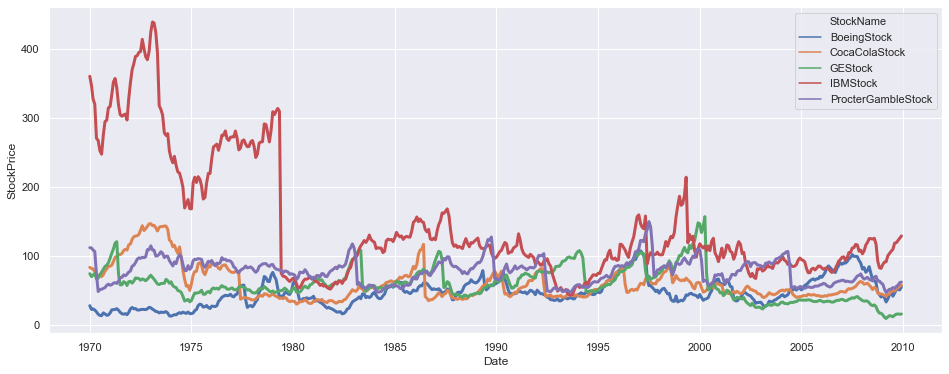

In [20]:
# Lineplot
#------------------
plt.figure(figsize = (16,6))
sns.lineplot(x = 'Date', y = 'StockPrice', hue = 'StockName', data=masterDF, lw=3);

#observations:-
#  IBM stocks is more likely to be in the upper margin compared to others 
#  cocacola,boeingstock & proctergamblestock prices are almost same in/towards latest year

# plot the trends individually, note your observations?

range(0, 5)

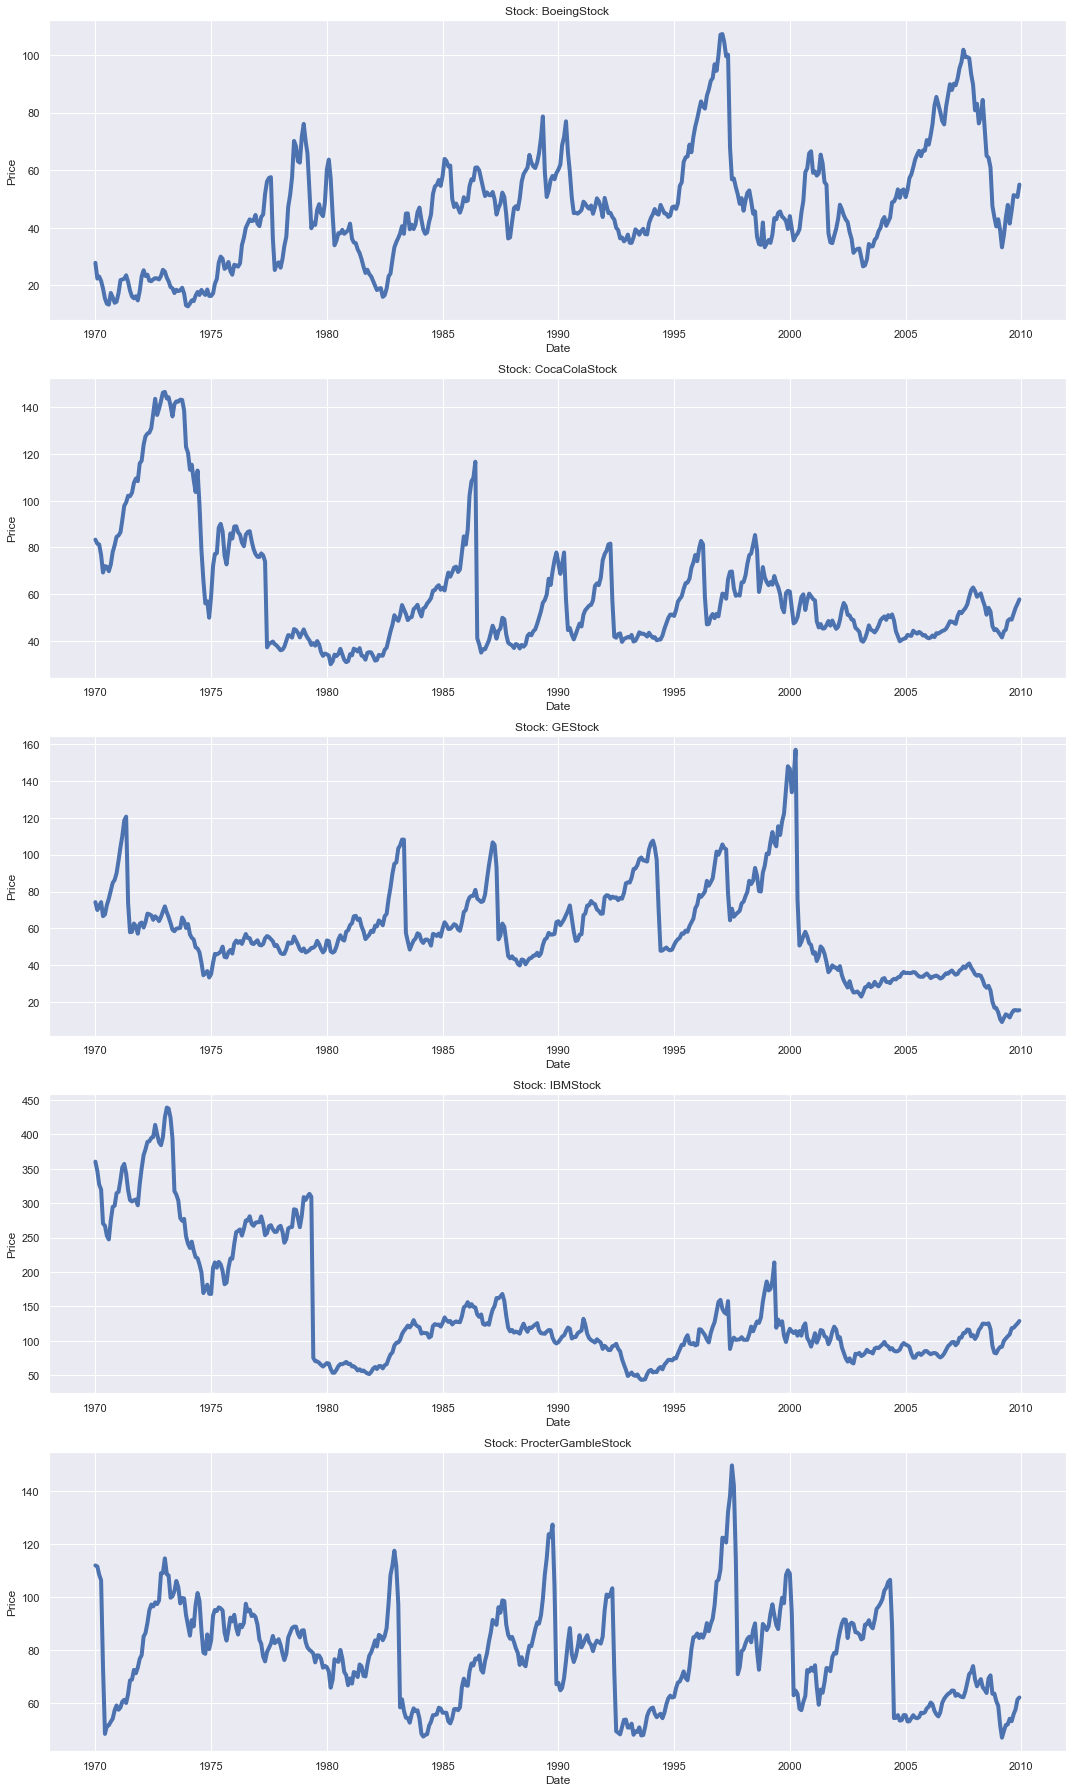

In [21]:
#  plotting trends individually
stocks = masterDF.StockName.unique()
g = plt.figure(figsize=(15, len(stocks)*5));
range(len(stocks))
for i in range(len(stocks)):
    df = masterDF[masterDF.StockName == stocks[i]];
    ax = plt.subplot(len(stocks), 1, i + 1);
    g = sns.lineplot(x = "Date", y = "StockPrice", data = df, ax = ax, estimator=None, lw=4);
    g = ax.set_title(('Stock: ' + str(stocks[i])));
    g = ax.set_xlabel('Date');
    g = ax.set_ylabel('Price');
    plt.tight_layout()
    
# observations:-
# BoeingSTock was heighest in 1997 and lowest in 1974
# contnuous rise in the price after 2003
#  sudden decrease in stock price after 2007
# max stock price went above 100 in 1997
#  overall observation says this stock is mainly for short term goals of 1 or 2 years maximum.



# Do you see any seasonality? do you see any variation across months?

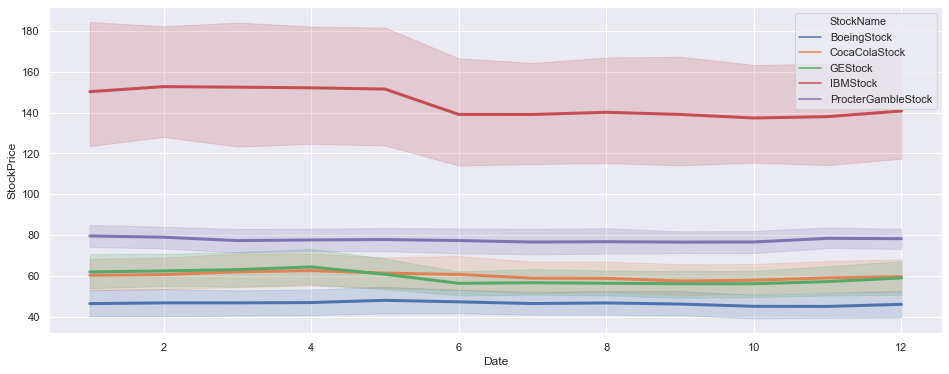

In [22]:
plt.figure(figsize = (16,6))
sns.lineplot(x = pd.to_datetime(masterDF['Date']).dt.month, y = 'StockPrice', hue = 'StockName', data=masterDF, lw=3);
#observations
# IBM stock price decreased from may to june and then stayed same throughout the year
# GE stock price decreased from april to june and then stayed same throughout the year
# almost all stock prices remain constant across all months.

# Plot monthly trends? Is there variation?

range(0, 5)

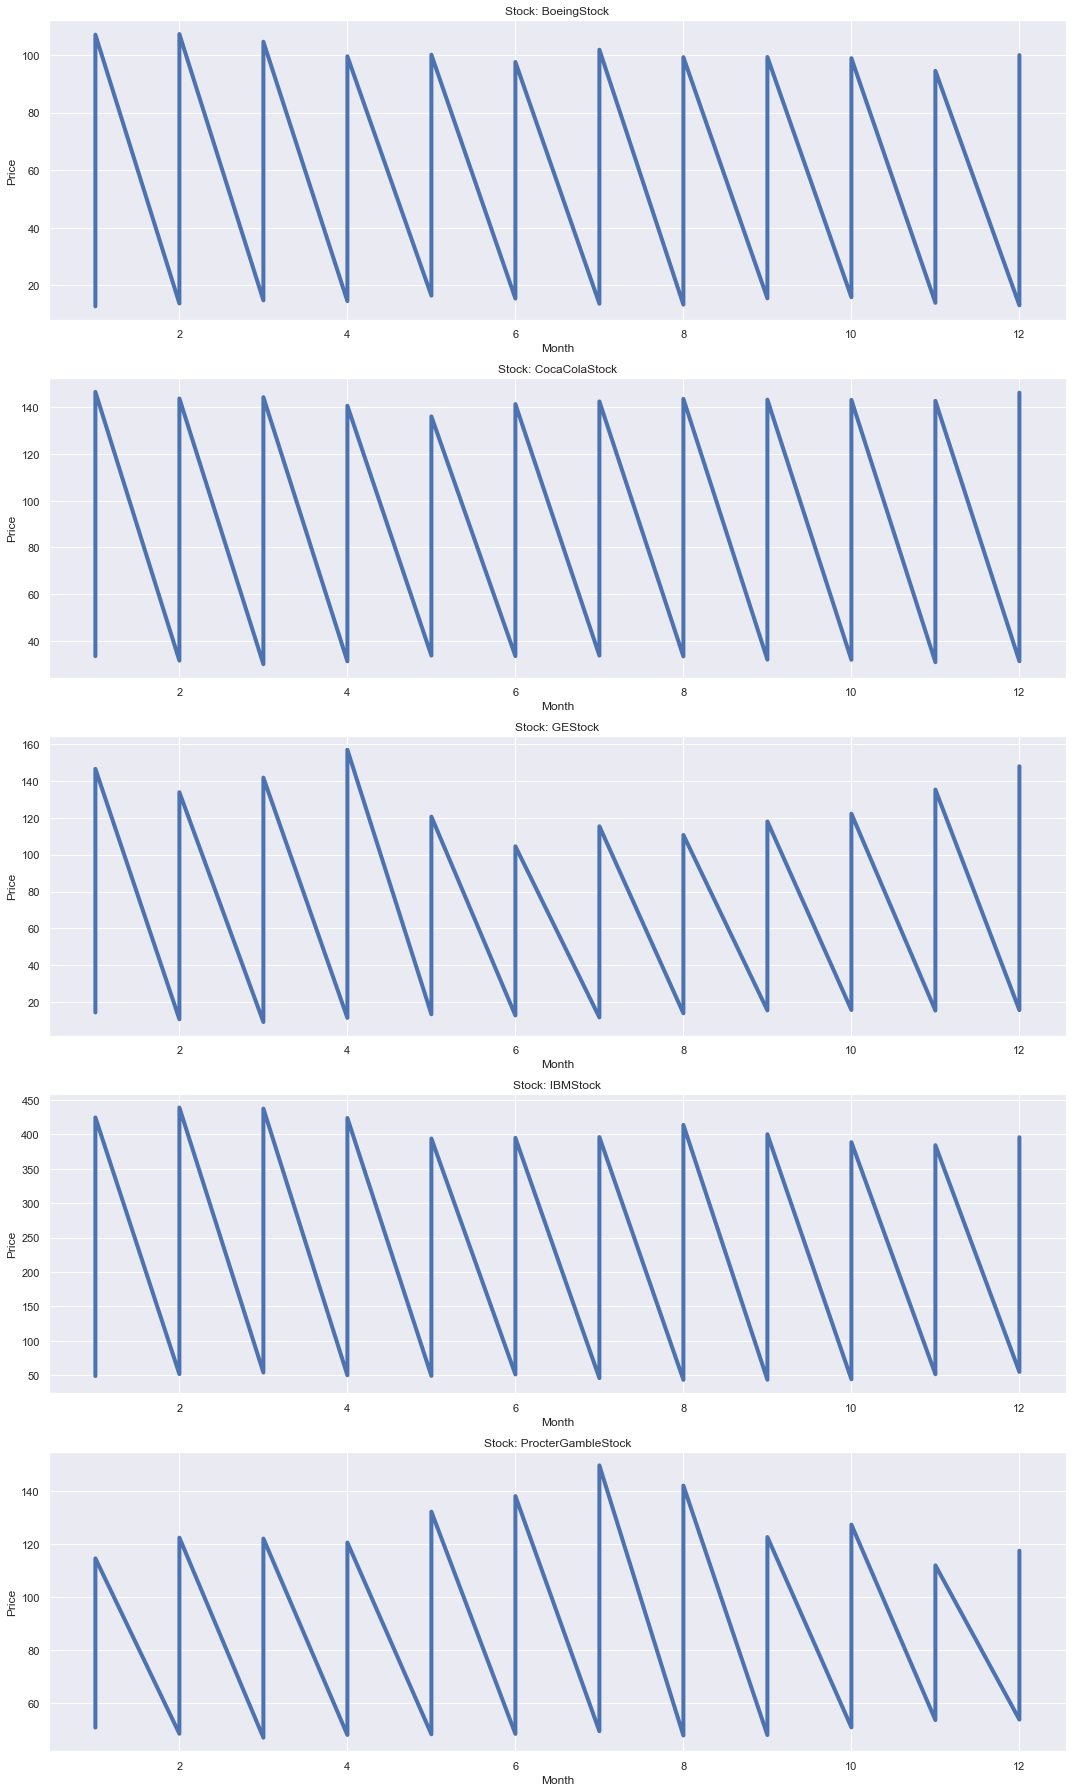

In [23]:
#  plotting trends individually
stocks = masterDF.StockName.unique()
g = plt.figure(figsize=(15, len(stocks)*5));
range(len(stocks))
for i in range(len(stocks)):
    df = masterDF[masterDF.StockName == stocks[i]];
    ax = plt.subplot(len(stocks), 1, i + 1);
    g = sns.lineplot(x = pd.to_datetime(masterDF['Date']).dt.month, y = "StockPrice", data = df, ax = ax, estimator=None, lw=4);
    g = ax.set_title(('Stock: ' + str(stocks[i])));
    g = ax.set_xlabel('Month');
    g = ax.set_ylabel('Price');
    plt.tight_layout()
    
    
# Yes there is a variation across the months.

# In the mid of every odd month of the year stock prices goes high 
# In the start of every even month of the year stocks are low
#  Eg : so its better to buy stocks at the start of 2nd month i.e february and sell it at the mid of 3rd month i.e march

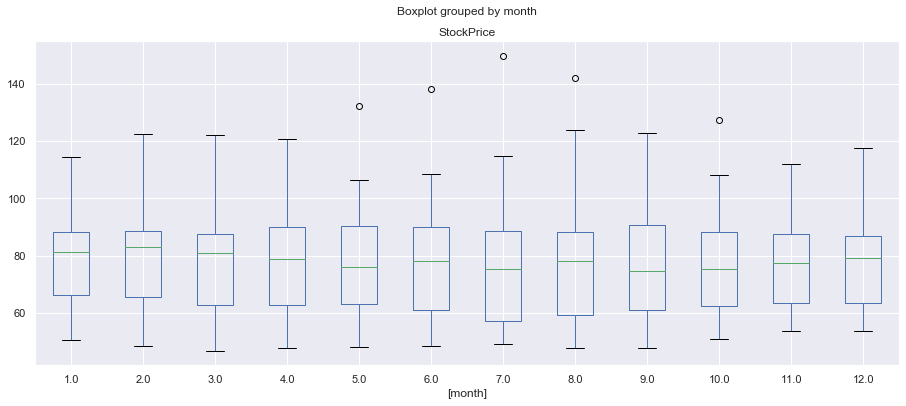

In [186]:
# box plot
masterDF['month'] = pd.to_datetime(df['Date']).dt.month
masterDF.boxplot(column=['StockPrice'],by=['month'],figsize=(15,6))

# observation 
# Maximum stock price is in august month where as lowest is in march month

In [32]:
# masterDF_wide.reset_index()
# masterDF_wide.set_index('StockName')

StockName,BoeingStock,CocaColaStock,GEStock,IBMStock,ProcterGambleStock
Date,,,,,
1970-01-01,27.85,83.37,74.25,360.32,111.87
1970-02-01,22.38,81.59,69.98,346.72,111.45
1970-03-01,23.11,81.34,72.16,327.35,108.45
1970-04-01,21.57,76.81,74.25,319.85,106.29
1970-05-01,18.93,69.28,66.67,270.38,73.33


## Task 4 - Correlations

In [10]:
# Are stocks correlated? Are they correlated across each year?

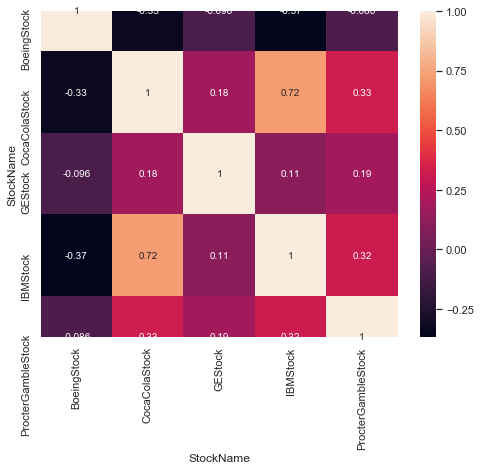

In [176]:
fig, ax = plt.subplots(figsize=(8,6)) 

correlation = masterDF_wide.corr()

sns.heatmap(correlation, annot = True,ax=ax)

# observations here are:-

#  Stocks with high correlation:

#         cococola & IBM

# Stocks with medium correlation:

#     IBM & Procter Gamble Stock

# Stocks with low correlation:

#   GE & IBM
#   GE & ProcterGamble

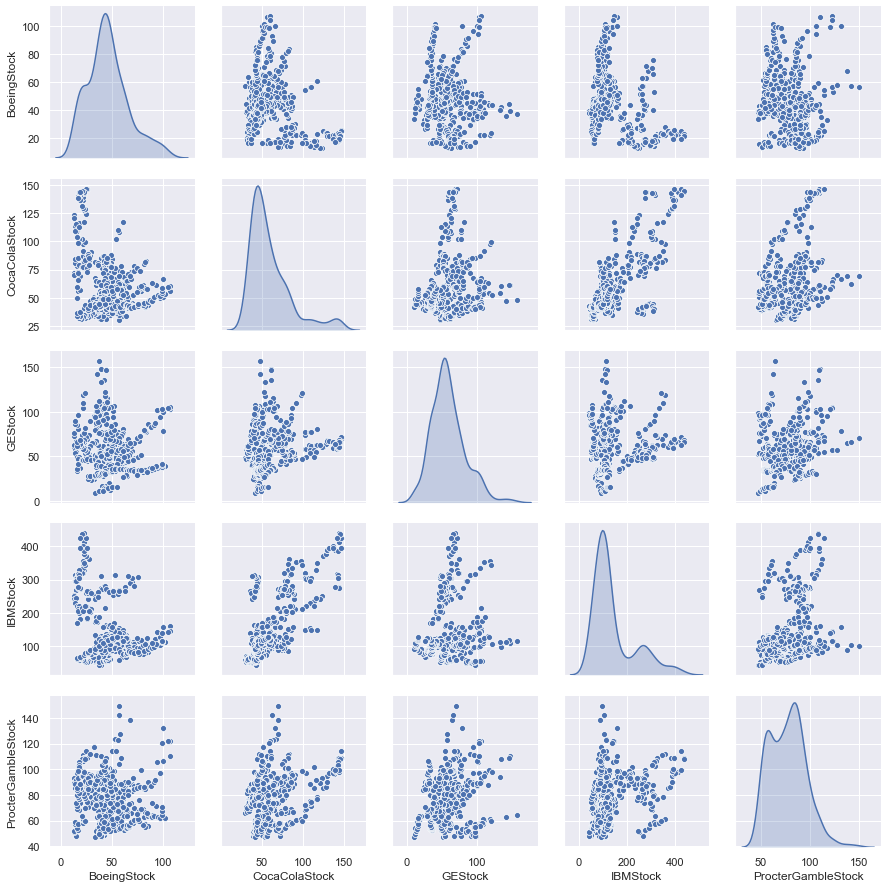

In [195]:
sns.pairplot(masterDF_wide,diag_kind='kde')

# we can identify skewness or if the data is normally distributed or not using pairplot
# Skenwess

# BoeingStock :- Positive/right skewed
# CocacolaStock :- Positive/right skewed
# GE stock :- normally distributed
# IBM stock:- Positive/right skewed
# ProcterGamble stock:- normally distributed

## Some Code help

In [196]:
# Correlation
#------------------
# masterDF.corr()
# masterDF[masterDF.Date > '1990-01-01'].corr()

# Lineplot
# #------------------
# plt.figure(figsize = (16,6))
# sns.lineplot(x = 'Date', y = 'value', hue = 'StockName', data=masterDF_long, lw=3);

# # Individual Lineplot
# #------------------


In [1]:
# stocks = masterDF_long.StockName.unique();
# g = plt.figure(figsize=(15, len(stocks)*5));

# for i in range(len(stocks)):
#     df = masterDF_long[masterDF_long.StockName == stocks[i]];
#     ax = plt.subplot(len(stocks), 1, i + 1);
#     g = sns.lineplot(x = "Date", y = "value", data = df, ax = ax, estimator=None, lw=4);
#     g = ax.set_title(('Stock: ' + str(stocks[i])));
#     g = ax.set_xlabel('Date');
#     g = ax.set_ylabel('Price');
#     plt.tight_layout()